<a href="https://colab.research.google.com/github/osh9149/2022_DataScience/blob/main/MBTI_wordcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 !pip install WordCloud konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
from konlpy.tag import Hannanum, Kkma, Twitter, Komoran, Mecab
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from tqdm import tqdm

from collections import Counter

In [ ]:
!apt-get install fonts-nanum*
!apt-get install fontconfig

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-gothic-light' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum fonts-nanum-coding fonts-nanum-eco fonts-nanum-extra
0 upgraded, 4 newly installed, 0 to remove and 49 not upgraded.
Need to get 37.0 MB of archives.
After this operation, 145 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum-eco all 1.000-6 [14

In [ ]:
from google.colab import files
uploaded = files.upload() # 파일 업로드 기능 실행

for fn in uploaded.keys(): # 업로드된 파일 정보 출력
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))

Saving ENFJ.csv to ENFJ.csv
User uploaded file "ENFJ.csv" with length 334523 bytes


# Load Dataset

In [ ]:
df = pd.read_csv(fn)

df.head()

,Unnamed: 0,num,title,content
0,1,5,사랑해요 엔프제,천사가 있다면 당신일 것
1,2,6,ㅎㅇ,너희들 다 내 거임
2,3,7,엔프제 갤러리 특),엔프제는 없고엔프제를 보려는 관객만 있다
3,4,8,갤주는 갤이름 대문자로 바꿔라. ㅈㄴ 불편하네,NaN
4,5,9,ㅎㅇㅎㅇ,엔갤 흥하길 바람


# Remove Empty Spaces

In [ ]:
df['title'] = df['title'].str.strip()
df['content'] = df['content'].str.strip()
df['title'].replace('', np.nan, inplace=True)
df['content'].replace('', np.nan, inplace=True)
df = df.dropna()

df.head()

,Unnamed: 0,num,title,content
0,1,5,사랑해요 엔프제,천사가 있다면 당신일 것
1,2,6,ㅎㅇ,너희들 다 내 거임
2,3,7,엔프제 갤러리 특),엔프제는 없고엔프제를 보려는 관객만 있다
4,5,9,ㅎㅇㅎㅇ,엔갤 흥하길 바람
5,6,12,엔프제 노무 부러워,니네 성격 나줘ㅡㅡ


# Extract Nouns

In [ ]:
extractor = Hannanum()

nouns = []

for i, row in tqdm(df.iterrows()):
    _, num, title, content = row

    if title and type(title) is str:
        nouns.extend(extractor.nouns(title))
    if content and type(content) is str:
        nouns.extend(extractor.nouns(content))

703it [00:20, 34.69it/s]


# Count Same Words

In [ ]:
count = Counter(nouns)
words = dict(count.most_common())
print(words)

{'나': 751, '사람': 439, '것': 403, '엔프제': 311, '생각': 226, '말': 179, '때': 162, '수': 154, '내': 144, '친구': 127, '진짜': 104, '성격': 101, '데': 95, '일': 88, '근데': 79, '뭐': 79, '너': 75, '사람들': 74, '얘': 72, '친구들': 71, '마음': 70, '여자': 69, '사랑': 64, '글': 64, '이': 58, '자기': 51, '적': 50, '지': 49, '이야기': 48, '유형': 46, '대화': 46, '엔프제들': 46, '주변': 46, '상처': 45, '애': 44, '기분': 44, '관계': 44, '라': 44, '우리': 43, '들': 43, '중': 42, '편': 41, '거': 40, '남자': 40, '남': 39, '상대': 36, '하나': 35, '한번': 35, '듯': 35, '행복': 35, '등': 35, '그': 34, '오늘': 34, '자신': 34, '행동': 34, '연애': 34, '검사': 33, '본인': 33, '이해': 32, '갤러리': 31, '저': 30, '뭔가': 30, '존': 30, '감정': 30, '누구': 30, '전': 29, '인간관계': 29, '연락': 29, '이거': 29, '정도': 29, '때문': 29, '상황': 29, '다들': 28, '줄': 28, '속': 27, '상대방': 27, '특징': 27, '여기': 27, '공부': 27, '성향': 27, '이상': 26, '고민': 26, '눈': 26, '앞': 25, '비슷': 24, '칭찬': 24, '시간': 24, '이유': 23, '예전': 23, '진심': 22, '평소': 22, '세상': 22, '집': 22, '인생': 21, '관심': 21, '서로': 21, '얘기': 21, '2': 20, '갤': 20, 'ㅋㅋㅋㅋㅋ': 20, '너희': 20,

# Remove Minority
- Remove the word length is 1
- Remove the word frequency is 1

In [ ]:
for word in list(words.keys()):
    if len(word) == 1:
        del words[word]
        continue
        
    if words[word] == 1:
        del words[word]
        
print(words)

{'사람': 439, '엔프제': 311, '생각': 226, '친구': 127, '진짜': 104, '성격': 101, '근데': 79, '사람들': 74, '친구들': 71, '마음': 70, '여자': 69, '사랑': 64, '자기': 51, '이야기': 48, '유형': 46, '대화': 46, '엔프제들': 46, '주변': 46, '상처': 45, '기분': 44, '관계': 44, '우리': 43, '남자': 40, '상대': 36, '하나': 35, '한번': 35, '행복': 35, '오늘': 34, '자신': 34, '행동': 34, '연애': 34, '검사': 33, '본인': 33, '이해': 32, '갤러리': 31, '뭔가': 30, '감정': 30, '누구': 30, '인간관계': 29, '연락': 29, '이거': 29, '정도': 29, '때문': 29, '상황': 29, '다들': 28, '상대방': 27, '특징': 27, '여기': 27, '공부': 27, '성향': 27, '이상': 26, '고민': 26, '비슷': 24, '칭찬': 24, '시간': 24, '이유': 23, '예전': 23, '진심': 22, '평소': 22, '세상': 22, '인생': 21, '관심': 21, '서로': 21, '얘기': 21, 'ㅋㅋㅋㅋㅋ': 20, '너희': 20, '부분': 20, '모습': 19, '호감': 19, '공감': 19, '지금': 19, 'ㅋㅋ': 19, '계획': 19, '분위기': 19, '사이': 19, '인프피': 18, '문제': 18, '그때': 18, '마스크': 18, '궁합': 17, '선물': 17, '노력': 17, '인팁': 17, '질문': 17, '그것': 17, '엄마': 17, '그녀': 17, '인프제': 16, '필요': 16, '소리': 16, '1.': 16, 'ㅋㅋㅋ': 16, '술자리': 16, '인간': 15, 'ㅠㅠ': 15, '미안': 15, '우울': 15, '완전'

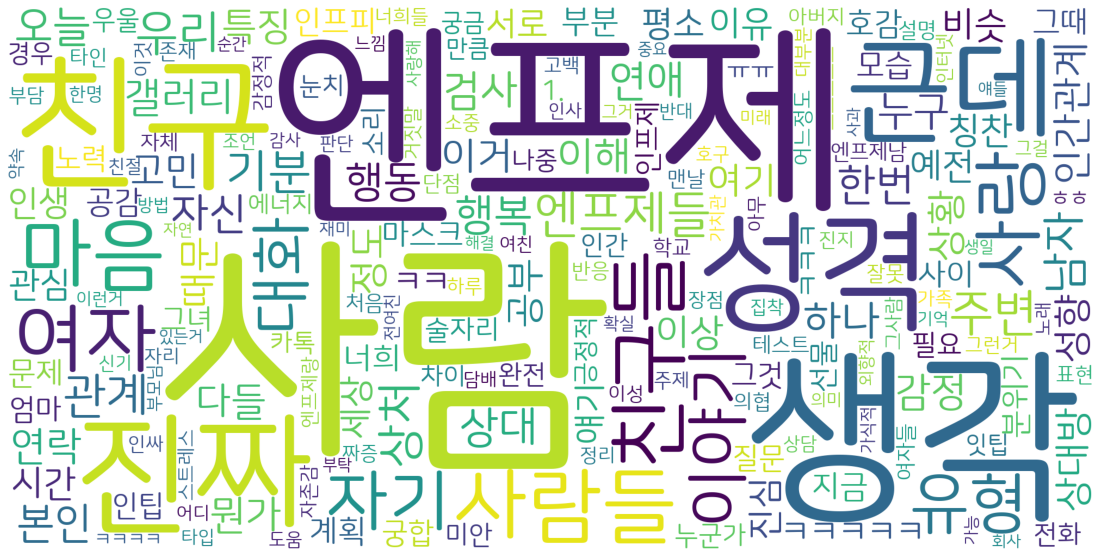

In [ ]:
wc = WordCloud(
    font_path='NanumSquareRoundR.ttf', #NanumGothicEco.ttf
    width=2000,
    height=1000,
    background_color='white').generate_from_frequencies(words)

plt.figure(figsize=(20, 10))
plt.imshow(wc)
plt.axis('off')
plt.show()

# Functionalize

In [ ]:
def create_wordcloud(csv_path):
    df = pd.read_csv(csv_path)
    
    df['title'] = df['title'].str.strip()
    df['content'] = df['content'].str.strip()
    df['title'].replace('', np.nan, inplace=True)
    df['content'].replace('', np.nan, inplace=True)
    df = df.dropna()
    
    extractor = Hannanum()

    nouns = []

    for i, row in tqdm(df.iterrows()):
        _, num, title, content = row

        if title and type(title) is str:
            nouns.extend(extractor.nouns(title))
        if content and type(content) is str:
            nouns.extend(extractor.nouns(content))
            
    count = Counter(nouns)
    words = dict(count.most_common())

    for word in list(words.keys()):
        if len(word) == 1:
            del words[word]
            continue

        if words[word] == 1:
            del words[word]

    wc = WordCloud(
      font_path='NanumSquareRoundR.ttf', #NanumGothicEco.ttf
      width=2000,
      height=1000,
      background_color='white').generate_from_frequencies(words)

    plt.figure(figsize=(20, 10))
    plt.title(csv_path)
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

# Result

In [ ]:
from glob import glob

for csv_path in sorted(glob('mbti_data/*.csv')):
    create_wordcloud(csv_path)

169it [00:21,  7.95it/s]


KeyboardInterrupt: ignored